In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Enhance IT Eje/Project/Proyects classroom/dataset/Hector JIMENEZ - MNIST_train.csv')

In [3]:
test = pd.read_csv('/content/drive/MyDrive/Enhance IT Eje/Project/Proyects classroom/dataset/Hector JIMENEZ - MNIST_test.csv')

In [4]:
train.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.tail()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,59999,59999,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.columns

Index(['Unnamed: 0', 'index', 'labels', '0', '1', '2', '3', '4', '5', '6',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=787)

In [7]:
train = train.drop(['Unnamed: 0','index'], axis=1)

In [8]:
#train = train.drop(['labels'], axis=1)

In [9]:
train.iloc[:,1:]

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.dtypes

labels    int64
0         int64
1         int64
2         int64
3         int64
          ...  
779       int64
780       int64
781       int64
782       int64
783       int64
Length: 785, dtype: object

In [11]:
train.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test.tail()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,9999,9999,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test = test.drop(['Unnamed: 0','index'], axis=1)

In [15]:
#test = test.drop(['labels'], axis=1)

In [16]:
test.iloc[:,1:]

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train['labels'].describe()

count    60000.000000
mean         4.453933
std          2.889270
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: labels, dtype: float64

In [19]:
test['labels'].describe()

count    10000.000000
mean         4.443400
std          2.895865
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: labels, dtype: float64

In [20]:
median = train.median()

In [21]:
median

labels    4.0
0         0.0
1         0.0
2         0.0
3         0.0
         ... 
779       0.0
780       0.0
781       0.0
782       0.0
783       0.0
Length: 785, dtype: float64

In [22]:
X_train = train.to_numpy()

In [23]:
X_train

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

In [24]:
X_train.shape

(60000, 785)

In [25]:
X_test = test.to_numpy()

In [26]:
X_test.shape

(10000, 785)

In [27]:
X_test

array([[7, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]])

In [28]:
X_test.shape

(10000, 785)

In [31]:
y_train=X_train[:,0]

In [32]:
X_train=X_train[:,1:]

In [33]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
y_train.shape

(60000,)

In [35]:
X_train.shape

(60000, 784)

In [36]:
y_test=X_test[:,0]

In [37]:
X_test=X_test[0:,1:]

In [38]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
y_test.shape

(10000,)

In [40]:
X_test.shape

(10000, 784)

### Naive Bayes

In [41]:
class GaussNB():
  
  def fit(self, X, y, epsilon=1e-3):

    self.likelihoods = dict ()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:

      X_k = X[y == k, : ]

      self.likelihoods[k] = {'mean': X_k.mean(axis = 0), "cov": X_k.var(axis = 0) + epsilon}
      self.priors[k] = len(X-k)/len(X)


  def predict(self, X):

    N, D = X.shape

    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      # Bayes Theorem application
      P_hat[:, k] = mvn.logpdf(X, l['mean'], l['cov']) + np.log(self.priors[k])
    
    return P_hat.argmax(axis = 1)

In [42]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [43]:
gnb = GaussNB()

In [44]:
gnb.fit(X_train, y_train)

In [45]:
y_hat_test = gnb.predict(X_test)

In [46]:
accuracy(y_test,y_hat_test)

0.5878

In [60]:
plot = np.reshape(X_train[1], (28, 28))

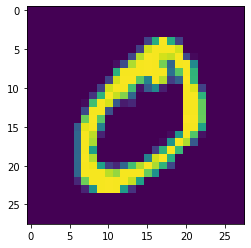

In [61]:
plt.imshow(plot)

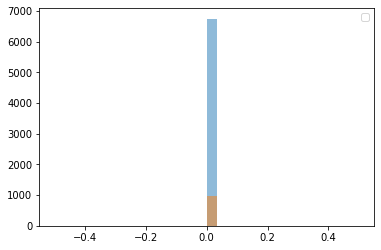

In [49]:
plt.figure()
plt.hist(X_train[y_train==1,0], alpha=0.5, bins=30)
plt.hist(X_test[y_test==0,0], alpha=0.5, bins=30)
plt.legend()

### KNN

In [50]:
class KNNClassifire():

  def fit(self, X , y):
    self.X=X
    self.y=y.astype(int)

  def predict(self, X, K, epsilon= 1e-3):

    N=len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

    return y_hat

In [51]:
knn = KNNClassifire()

In [52]:
knn.fit(X_train, y_train)

In [53]:
y_hat1=knn.predict(X_test, 10)

In [54]:
accuracy(y_test, y_hat1)

0.9684

###Gauss Bayes

In [55]:
class GaussBayes():

  def fit(self,X,y,epsilon=1e-3):

    self.likelihoods=dict()
    self.priors=dict()
    self.k = set(y.astype(int))

    for k in self.k:
      X_k = X[y==k,:]

      N_k, D = X_k.shape
      mu_k = X_k.mean(axis=0)
      self.likelihoods[k] = {"mean":X.mean(axis=0),"cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon* np.identity(D)}
      self.priors[k] = len(X_k) / len(X)

  def predict(self,X):
    N,D = X.shape
    P_hat = np.zeros((N,len(self.k)))
    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X,l["mean"],l["cov"])+np.log(self.priors[k])
    
    return P_hat.argmax(axis=1)

In [56]:
gby = GaussBayes()

In [57]:
gby.fit(X_train,y_train, epsilon=1e-2)

In [58]:
y_hat2 = gby.predict(X_test)

In [59]:
accuracy(y_test,y_hat2)

0.2117